In [ ]:
#Dependencies
import pandas as pd
import numpy as np
import os

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Maestría/Investigación/Revisión de Literatura/Datasets Latinamerica
!ls

/content/drive/MyDrive/Maestría/Investigación/Revisión de Literatura/Datasets Latinamerica
 compare_datasets.ipynb
 data_preprocessing_summary.csv
 filter_papers_title_abstract_review.ipynb
 latin_america_full_paper_review.csv
'Latin America.gdoc'
 latin_america_review_abstract_title.csv
 latin_america_review_abstract_title.gsheet
 PDF
 Plots
'Raw Search'


In [ ]:
import gspread
from google.colab import auth
from google.auth import default

In [ ]:
# Authenticate with Google Sheets API
auth.authenticate_user()
creds, _ = default()
client = gspread.authorize(creds)
#client.list_spreadsheet_files()

In [ ]:
# Replace the values in the following variables with your own values
SPREADSHEET_NAME = 'latin_america_review_abstract_title'
SHEET_NAME = 'latin_america_review_abstract_title'

# Open the Google Sheets file
sheet = client.open(SPREADSHEET_NAME).worksheet(SHEET_NAME)
# Convert the worksheet data to a list of lists
data = sheet.get_all_values()
data = np.array(data)

# Generate the index values from 1 to the number of rows
index_values = np.arange(1, data.shape[0] + 1).reshape(-1, 1)

# Add a new column at the beginning of the array
data = np.concatenate((index_values, data), axis=1)

# Convert the list of lists to a Pandas DataFrame
docs_final = pd.DataFrame(data[10:], columns=data[9])

docs_final = docs_final.set_index('10')
docs_final.index.names = ['Index']

docs_final

,Comments,Accepted,Abstract,Title,Authors,Year,Source title,Volume,Issue,Art. No.,...,Subject,EID,duplicatedIn,country,emailHost,institution,institutionWithCountry,authorFull,Unnamed: 0,PMCID
Index,,,,,,,,,,,,,,,,,,,,,
11,Data analysis of breast cancer and mammography...,Yes,Background Mammographic screening has been use...,10-year opportunistic mammographic screening s...,"Cuoghi I.C., da Silva Soares M.F., dos Santos ...",2022,Journal of Global Health,12,,4061,...,,2-s2.0-85139880822,,Brazil,usp.br,,,"Cuoghi I.C., da Silva Soares M.F., dos Santos ...",,
12,Review,No,Background: The Journal of Infection and Publi...,A bibiliometric analysis of the Journal of Inf...,"Krauskopf, E.",2018,JOURNAL OF INFECTION AND PUBLIC HEALTH,11,2,,...,"Public, Environmental & Occupational Health; I...",WOS:000426961500014,,Chile,unab.cl,Univ Andres Bello,"Univ Andres Bello, Chile","Krauskopf, Erwin",,
13,Review,No,Objectives: To measure Peruvian scientific pro...,A bibliometric analysis of 47-years of researc...,"Sevillano-Jimenez J., Carrion-Chambilla M., Es...",2023,Electronic Journal of General Medicine,20,4,em488,...,,2-s2.0-85152736068,,Peru,upch.pe,,,"Sevillano-Jimenez J., Carrion-Chambilla M., Es...",,
14,Analysis of transplants in Argentina. Using op...,Yes,Background: The number of transplants performe...,Access to Grafts in a Liver Transplant Center:...,"Daciuk N.I., Quinonez E.G., Poupard M., Vergar...",2018,Transplantation Proceedings,50,2,,...,,2-s2.0-85044141657,,Argentina,yahoo.com.ar,,,"Daciuk N.I., Quinonez E.G., Poupard M., Vergar...",,
15,Review,No,Introduction: Unrestricted access to journal p...,Access to top-cited emergency care articles (p...,"Hamzy M.A., de Villiers D., Banner M., Lamprec...",2019,Western Journal of Emergency Medicine,20,3,,...,,2-s2.0-85066853321,,South Africa,uct.ac.za,,,"Hamzy M.A., de Villiers D., Banner M., Lamprec...",,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,They include non-american subjects and a datab...,Yes,Genes in the noncanonical WNT signaling pathwa...,Burden of rare deleterious variants in WNT sig...,"Hebert L, Hillman P, Baker C, Brown M, Ashley-...",2020,PLoS One,,,,...,,,,,,,,,105,PMC7514064
537,wheat genomics,No,Genomic selection (GS) models use genome-wide ...,Increased prediction accuracy in wheat breedin...,"Lopez-Cruz M, Crossa J, Bonnett D, Dreisigacke...",2015,G3 (Bethesda),,,,...,,,,,,,,,115,PMC4390573
538,Mexican dataset. It's available at the discret...,Yes,Objectives: To evaluate the performance of an ...,Evaluation of an AI system for the detection o...,"Rogers TW, Gonzalez-Bueno J, Garcia Franco R, ...",2021,Eye (Lond),,,,...,,,,,,,,,124,PMC8026959


### Filter the file

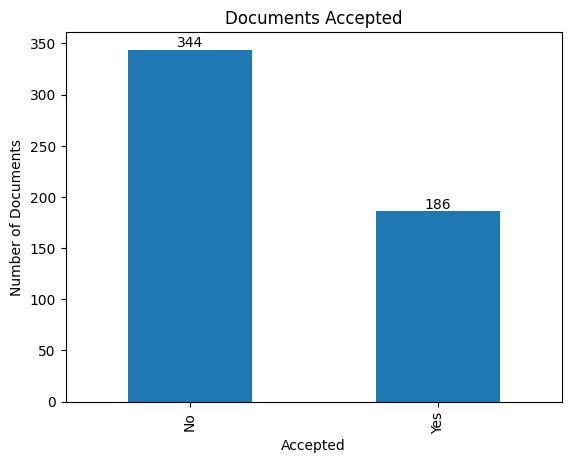

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Count the occurrences of each value
value_counts = docs_final.Accepted.value_counts()

# Create the bar plot
ax = value_counts.plot(kind='bar')

# Set labels and title
plt.xlabel('Accepted')
plt.ylabel('Number of Documents')
plt.title('Documents Accepted')

# Add labels to the bars
for i, v in enumerate(value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.savefig('Plots/Documents Accepted Abstract and Ttile')
# Display the plot
plt.show()

In [ ]:
# Take the docs with Accepted = Yes
docs_final = docs_final[docs_final['Accepted'] == 'Yes']

In [ ]:
docs_index = [int(doc_index) for doc_index in docs_final.index.to_list()]
print(f'The number of accepted is {len(docs_index)}')

The number of accepted is 186


In [ ]:
# Get pdfs
pdfs = [int(pdf.split('.')[0]) for pdf in os.listdir('PDF')]
print(f'The number of pdfs is {len(pdfs)}')

The number of pdfs is 186


In [ ]:
def check_pdfs(list1, list2, name1, name2):
  dois_in1_not_in2 = list(set(list1) - set(list2))

  dois_in2_not_in1 = list(set(list2) - set(list1))

  if (len(dois_in1_not_in2) == 0) and (len(dois_in2_not_in1) == 0):
    print('Both files have the same pdfs!')
  else:
    if (len(dois_in1_not_in2) != 0):
      print(f'{name1} has {dois_in1_not_in2} pdfs that are not in {name2}')
    if (len(dois_in2_not_in1) != 0):
      print(f'{name2} has {dois_in2_not_in1} pdfs that are not in {name1}')
  return dois_in1_not_in2, dois_in2_not_in1

In [ ]:
_, _ = check_pdfs(docs_index, pdfs, name1='Google Sheet', name2='PDF')

Both files have the same pdfs!


### Filter Columns

In [ ]:
print(f'Initial Columns: {len(docs_final.columns)}')

cols_to_keep = ['Comments', 'Abstract', 'Title', 'Authors', 'Year',
                'Source title', 'Cited by', 'DOI', 'Link', 'Affiliations',
                'Author Keywords', 'Index Keywords', 'bothKeywords',
                'Document Type', 'Source', 'country']

docs_final = docs_final[cols_to_keep]
print(f'Initial Columns: {len(docs_final.columns)}')

Initial Columns: 46
Initial Columns: 16


In [ ]:
docs_final.Source = docs_final.Source.apply(lambda x: 'Pubmed' if x == '' else x)

# Plot Source

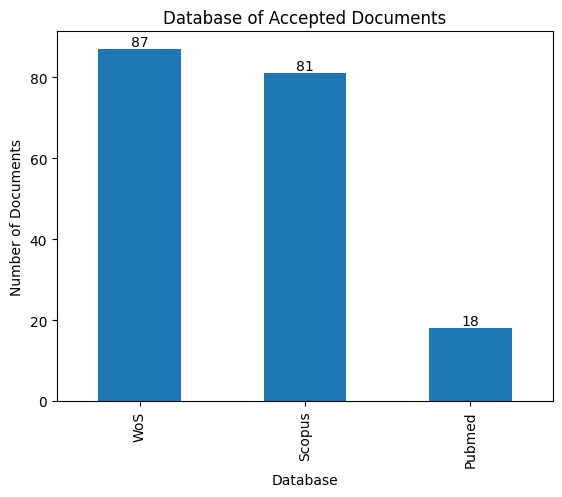

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Count the occurrences of each value
value_counts = docs_final.Source.value_counts()

# Create the bar plot
ax = value_counts.plot(kind='bar')

# Set labels and title
plt.xlabel('Database')
plt.ylabel('Number of Documents')
plt.title('Database of Accepted Documents')

# Add labels to the bars
for i, v in enumerate(value_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

#plt.savefig('Plots/Documents Per DB')
# Display the plot
plt.show()

In [ ]:
docs_final = docs_final.reset_index()

In [ ]:
import csv
docs_final.to_csv('latin_america_full_paper_review.csv', sep='\t', index=False, encoding='utf-8', quoting=csv.QUOTE_ALL)

In [ ]:
docs_final

,Index,Comments,Abstract,Title,Authors,Year,Source title,Cited by,DOI,Link,Affiliations,Author Keywords,Index Keywords,bothKeywords,Document Type,Source,country
0,11,Data analysis of breast cancer and mammography...,Background Mammographic screening has been use...,10-year opportunistic mammographic screening s...,"Cuoghi I.C., da Silva Soares M.F., dos Santos ...",2022,Journal of Global Health,1,10.7189/jogh.12.04061,https://www.scopus.com/inward/record.uri?eid=2...,CEPAM – Centro de Pesquisa Avançada em Medicin...,,adult; aged; Brazil; breast tumor; cross-secti...,adult;aged;Brazil;breast tumor;cross-sectional...,Article,Scopus,Brazil
1,14,Analysis of transplants in Argentina. Using op...,Background: The number of transplants performe...,Access to Grafts in a Liver Transplant Center:...,"Daciuk N.I., Quinonez E.G., Poupard M., Vergar...",2018,Transplantation Proceedings,0,10.1016/j.transproceed.2017.12.049,https://www.scopus.com/inward/record.uri?eid=2...,"Liver Transplant Unit, Hospital El Cruce, Flor...",,adult; Argentina; Article; child; comparative ...,adult;Argentina;Article;child;comparative stud...,Article,Scopus,Argentina
2,16,Predictive autoregressive model of covid: Data...,Different countries have adopted various contr...,Adaptive Multi-Factor Quantitative Analysis an...,"Pei Y., Li J., Xu S., Xu Y.",2022,Frontiers in Medicine,1,10.3389/fmed.2022.828691,https://www.scopus.com/inward/record.uri?eid=2...,"Clinical Data Center, Guangzhou Women and Chil...",adaptive multi-factor model; COVID-19; social ...,SARS-CoV-2 vaccine; Article; Brazil; coronavir...,adaptive multi-factor model;COVID-19;social is...,Article,Scopus,China
3,18,Covid forecast: Dataset: Open covid-19 data se...,The current spreading of the SARS-CoV-2 pandem...,A Deep Learning Approach to Forecast SARS-CoV-...,"Aguilar, I.L., Ibanez-Reluz, M., Aguilar, J.C....",2021,"COMPUTATIONAL SCIENCE AND ITS APPLICATIONS, IC...",0,10.1007/978-3-030-86970-0_22,,"[Luis Aguilar, I] Natl Univ Piura, Dept Math, ...",Deep learning; SARS-CoV-2; Temporal convolutio...,,Deep learning;SARS-CoV-2;Temporal convolutiona...,Proceedings Paper,WoS,Peru;Brazil
4,20,Predictive autoregressive model of covid: They...,Here we present a discrete-time-evolution mode...,A discrete-time-evolution model to forecast pr...,"Curado E.M.F., Curado M.R.",2020,PLoS ONE,3,10.1371/journal.pone.0241472,https://www.scopus.com/inward/record.uri?eid=2...,"Centro Brasileiro de Pesquisas Físicas, Rio de...",,Article; asymptomatic infection; Brazil; case ...,Article;asymptomatic infection;Brazil;case stu...,Article,Scopus,Brazil;Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,526,"They use 3 datasets: INbreast (Portugal), CBIS...",The implementation of deep learning-based comp...,A real use case of semi-supervised learning fo...,"Calderon-Ramirez S, Murillo-Hernandez D, Rojas...",2022,Med Biol Eng Comput,,10.1007/s11517-021-02497-6,,,,,,,Pubmed,
182,531,They use samples of expression profiles from 8...,Abstract\nThe most frequently diagnosed histol...,Molecular Differences between Squamous Cell Ca...,"Campos-Parra AD, Pérez-Quintanilla M, Martínez...",2022,Curr Oncol,,10.3390/curroncol29070372,,,,,,,Pubmed,
183,532,Clinical data available in the public database...,"Children, although mostly affected mildly or a...",Predictors of ICU Admission in Children with C...,"Cárdenas-Rojas MI, Guzmán-Esquivel J, Murillo-...",2023,J Clin Med,,10.3390/jcm12103593,,,,,,,Pubmed,
184,536,They include non-american subjects and a datab...,Genes in the noncanonical WNT signaling pathwa...,Burden of rare deleterious variants in WNT sig...,"Hebert L, Hillman P, Baker C, Brown M, Ashley-...",2020,PLoS One,,10.1371/journal.pone.0239083,,,,,,,Pubmed,
